In [1]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2
using CairoMakie 
using MeasureBase


In [2]:
using Newtrinos

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x5b6ff2434a9ba445, 0xa5c0dd1bc766fcf6, 0xdde462d2c802ca8b, 0xb25adfc627e45904, 0xce216a699cfefd28, 0x703aa1963d693733, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [3]:
osc_cfg_ADD = Newtrinos.osc.OscillationConfig(
    flavour = Newtrinos.osc.ADD(three_flavour=Newtrinos.osc.ThreeFlavour(ordering=:NO), N_KK=5),
    #flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction = Newtrinos.osc.SI(),
    )

osc = Newtrinos.osc.configure(osc_cfg_ADD)
atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec = Newtrinos.xsec.configure()

physics_ADD = (; osc, atm_flux, earth_layers, xsec);

In [4]:
experiments_ADD = (;
    juno = Newtrinos.juno.configure(physics_ADD)
);

[ Info: Loading juno data


In [5]:
p_ADD = Newtrinos.get_params(experiments_ADD)

(ADD_radius = 0.01, detection_epsilon = 1.0, energy_scale = 1.0, flux_scale = 1.0, geo_rate_norm = 1.0, geo_shape_eps = 0.0, m₀ = 0.01, res_a = 0.0261, res_b = 0.0082, res_c = 0.0123, shape_eps = 0.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [6]:
params_ADD_new = (ADD_radius = 0.5, detection_epsilon = 1.0, energy_scale = 1.0, flux_scale = 1.0, geo_rate_norm = 1.0, geo_shape_eps = 0.0, m₀ = 0.05, res_a = 0.0261, res_b = 0.0082, res_c = 0.0123, shape_eps = 0.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

(ADD_radius = 0.5, detection_epsilon = 1.0, energy_scale = 1.0, flux_scale = 1.0, geo_rate_norm = 1.0, geo_shape_eps = 0.0, m₀ = 0.05, res_a = 0.0261, res_b = 0.0082, res_c = 0.0123, shape_eps = 0.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [7]:
pri_ADD = Newtrinos.get_priors(experiments_ADD)

(ADD_radius = LogUniform{Float64}(a=0.001, b=1.0), detection_epsilon = Normal{Float64}(μ=1.0, σ=0.01), energy_scale = Normal{Float64}(μ=1.0, σ=0.005), flux_scale = Normal{Float64}(μ=1.0, σ=0.02), geo_rate_norm = Normal{Float64}(μ=1.0, σ=0.3), geo_shape_eps = Normal{Float64}(μ=0.0, σ=1.0), m₀ = LogUniform{Float64}(a=0.001, b=1.0), res_a = Normal{Float64}(μ=0.0261, σ=0.0002), res_b = Normal{Float64}(μ=0.0082, σ=0.0001), res_c = Normal{Float64}(μ=0.0123, σ=0.0004), shape_eps = Normal{Float64}(μ=0.0, σ=1.0), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976))

In [8]:
priors_ADD_new = (ADD_radius = LogUniform(0.001, 2.0), detection_epsilon = Normal(1.0, 0.01), energy_scale = Normal(1.0, 0.005), flux_scale = Normal(1.0, 0.02), geo_rate_norm = Normal(1.0, 0.3), geo_shape_eps = Normal(0.0, 1.0), m₀ = LogUniform(0.001, 1.0), res_a = Normal(0.0261, 0.0002), res_b = Normal(0.0082, 0.0001), res_c = Normal(0.0123, 0.0004), shape_eps = Normal(0.0, 1.0), Δm²₂₁ = Uniform(6.5e-5, 9.0e-5), Δm²₃₁ = Uniform(0.002, 0.003), δCP = Uniform(0.0, 6.283185307179586), θ₁₂ = Uniform(0.4205343352839651, 0.7853981633974483), θ₁₃ = Uniform(0.1, 0.2), θ₂₃ = Uniform(0.5235987755982988, 1.0471975511965976))

(ADD_radius = LogUniform{Float64}(a=0.001, b=2.0), detection_epsilon = Normal{Float64}(μ=1.0, σ=0.01), energy_scale = Normal{Float64}(μ=1.0, σ=0.005), flux_scale = Normal{Float64}(μ=1.0, σ=0.02), geo_rate_norm = Normal{Float64}(μ=1.0, σ=0.3), geo_shape_eps = Normal{Float64}(μ=0.0, σ=1.0), m₀ = LogUniform{Float64}(a=0.001, b=1.0), res_a = Normal{Float64}(μ=0.0261, σ=0.0002), res_b = Normal{Float64}(μ=0.0082, σ=0.0001), res_c = Normal{Float64}(μ=0.0123, σ=0.0004), shape_eps = Normal{Float64}(μ=0.0, σ=1.0), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976))

In [9]:
a_ADD = Newtrinos.juno.get_assets(physics_ADD);

[ Info: Loading juno data


In [10]:
pro_ADD = Newtrinos.juno.osc_calc(p_ADD, physics_ADD, a_ADD)

(P_ee = [0.8714123486556886 0.8829560203999726 … 0.8740677709491973 0.265565074788452; 0.8655425920911807 0.8462250413928216 … 0.787539862859517 0.16656106767690457; … ; 0.7479760608895978 0.7464390351910831 … 0.7399201611760279 0.523311502551032; 0.7466647334501327 0.7449795258466677 … 0.7381109119049605 0.5263744252062532], prob_weighted_flat = [0.8536285515262043, 0.8089364427682534, 0.7706014988794283, 0.7934360584624537, 0.7604719808150842, 0.7118564591276548, 0.7278512168394038, 0.7255594480472414, 0.6754199003361336, 0.6519571084633353  …  0.7429324833976757, 0.7424216627689261, 0.7418407108980064, 0.7411956988279785, 0.7404820430422315, 0.7396854834887254, 0.738784307884884, 0.7377558267019507, 0.7365768162716761, 0.7352295561489106])

In [11]:
lik_ADD = Newtrinos.generate_likelihood(experiments_ADD);

In [12]:
osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)
atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics_SM = (; osc)

experiments_SM = (;
    juno = Newtrinos.juno.configure(physics_SM)
)

p_SM = Newtrinos.get_params(experiments_SM)
pri_SM = Newtrinos.get_priors(experiments_SM)
a_SM = Newtrinos.juno.get_assets(physics_SM)
pro_SM = Newtrinos.juno.osc_calc(p_SM, physics_SM,a_SM)
lik_SM = Newtrinos.generate_likelihood(experiments_SM);

[ Info: Loading juno data
[ Info: Loading juno data


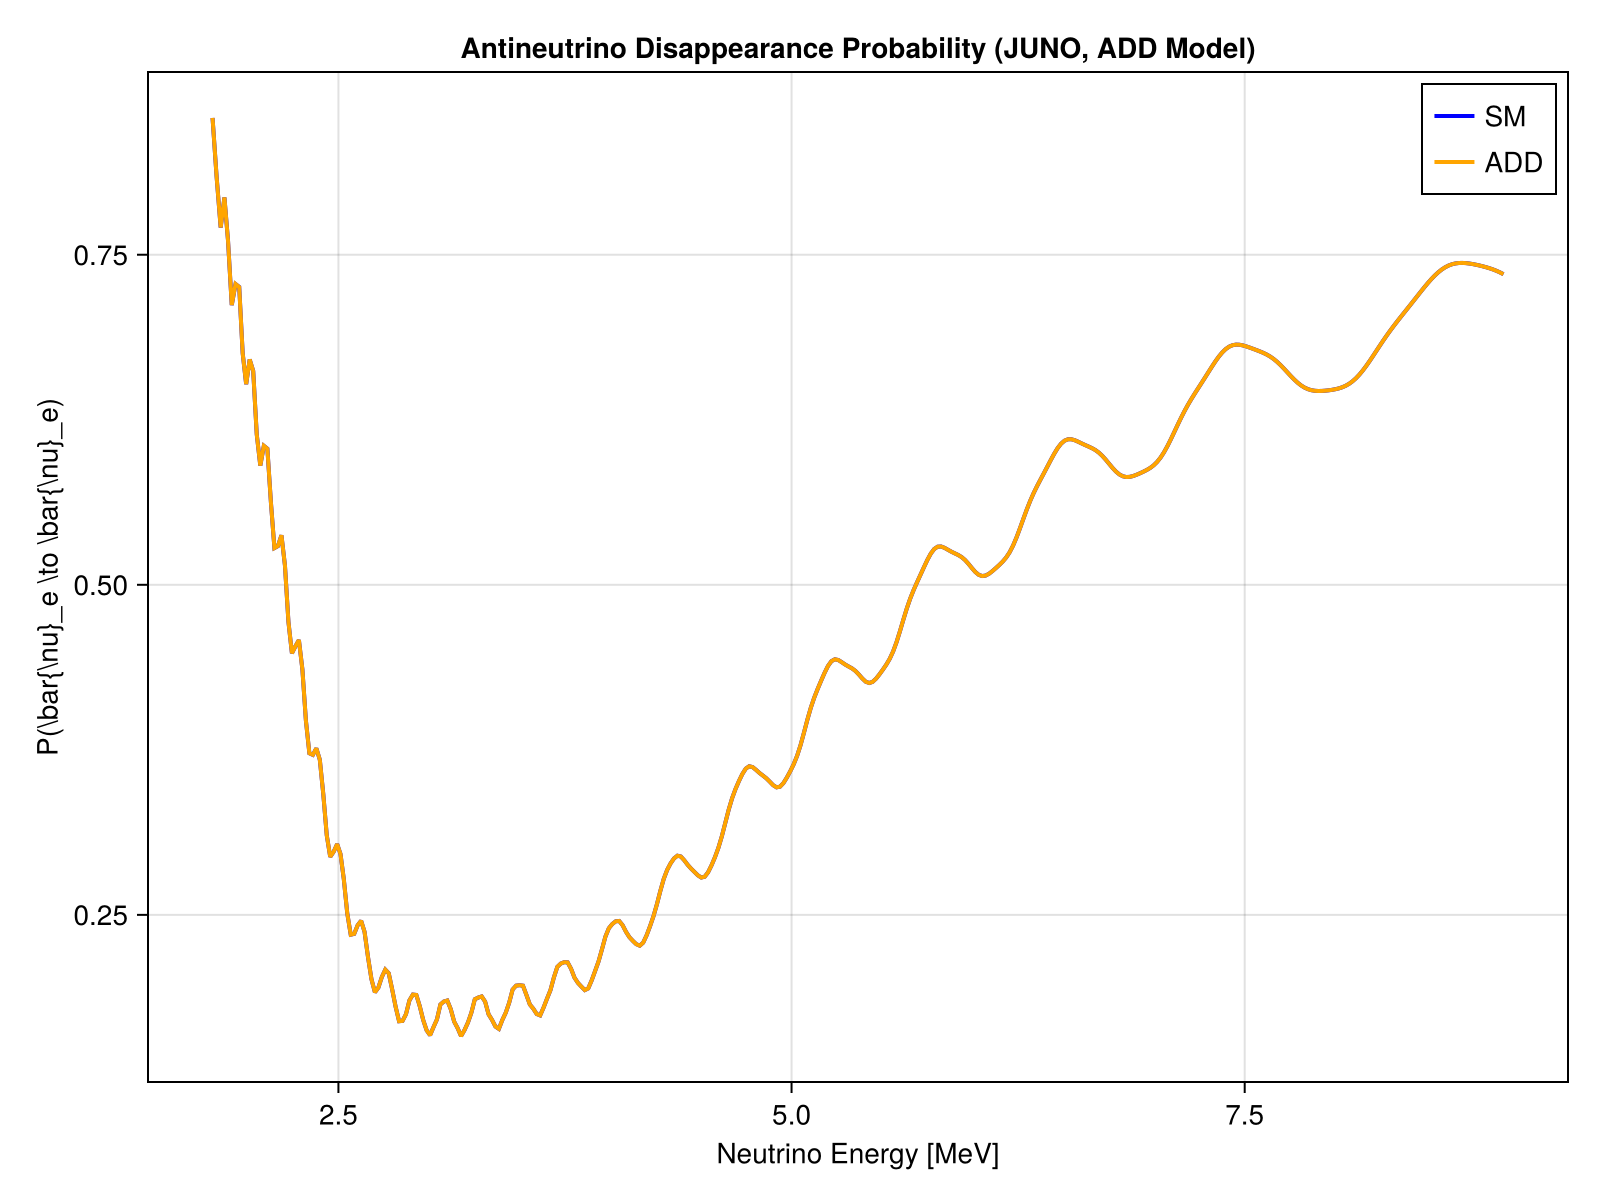

In [14]:
P_ee_ADD = pro_ADD.P_ee    

E_vis_ADD = a_ADD.E_bins_visible  

E_nu_ADD = a_ADD.visible_to_neutrino_interp.(E_vis_ADD .* p_ADD.energy_scale) 

P_ee_SM = pro_SM.P_ee   

E_vis_SM = a_SM.E_bins_visible  

E_nu_SM = a_SM.visible_to_neutrino_interp.(E_vis_SM .* p_SM.energy_scale)  

fig = Figure(size=(800, 600))
ax = Axis(fig[1, 1],
    xlabel="Neutrino Energy [MeV]",
    ylabel="P(\\bar{\\nu}_e \\to \\bar{\\nu}_e)",
    title="Antineutrino Disappearance Probability (JUNO, ADD Model)"
)



CairoMakie.lines!(ax, E_nu_SM, pro_SM.prob_weighted_flat, color=:blue, linewidth=2, label="SM")
CairoMakie.lines!(ax, E_nu_ADD, pro_ADD.prob_weighted_flat, color=:orange, linewidth=2, label="ADD")


axislegend(ax)
fig

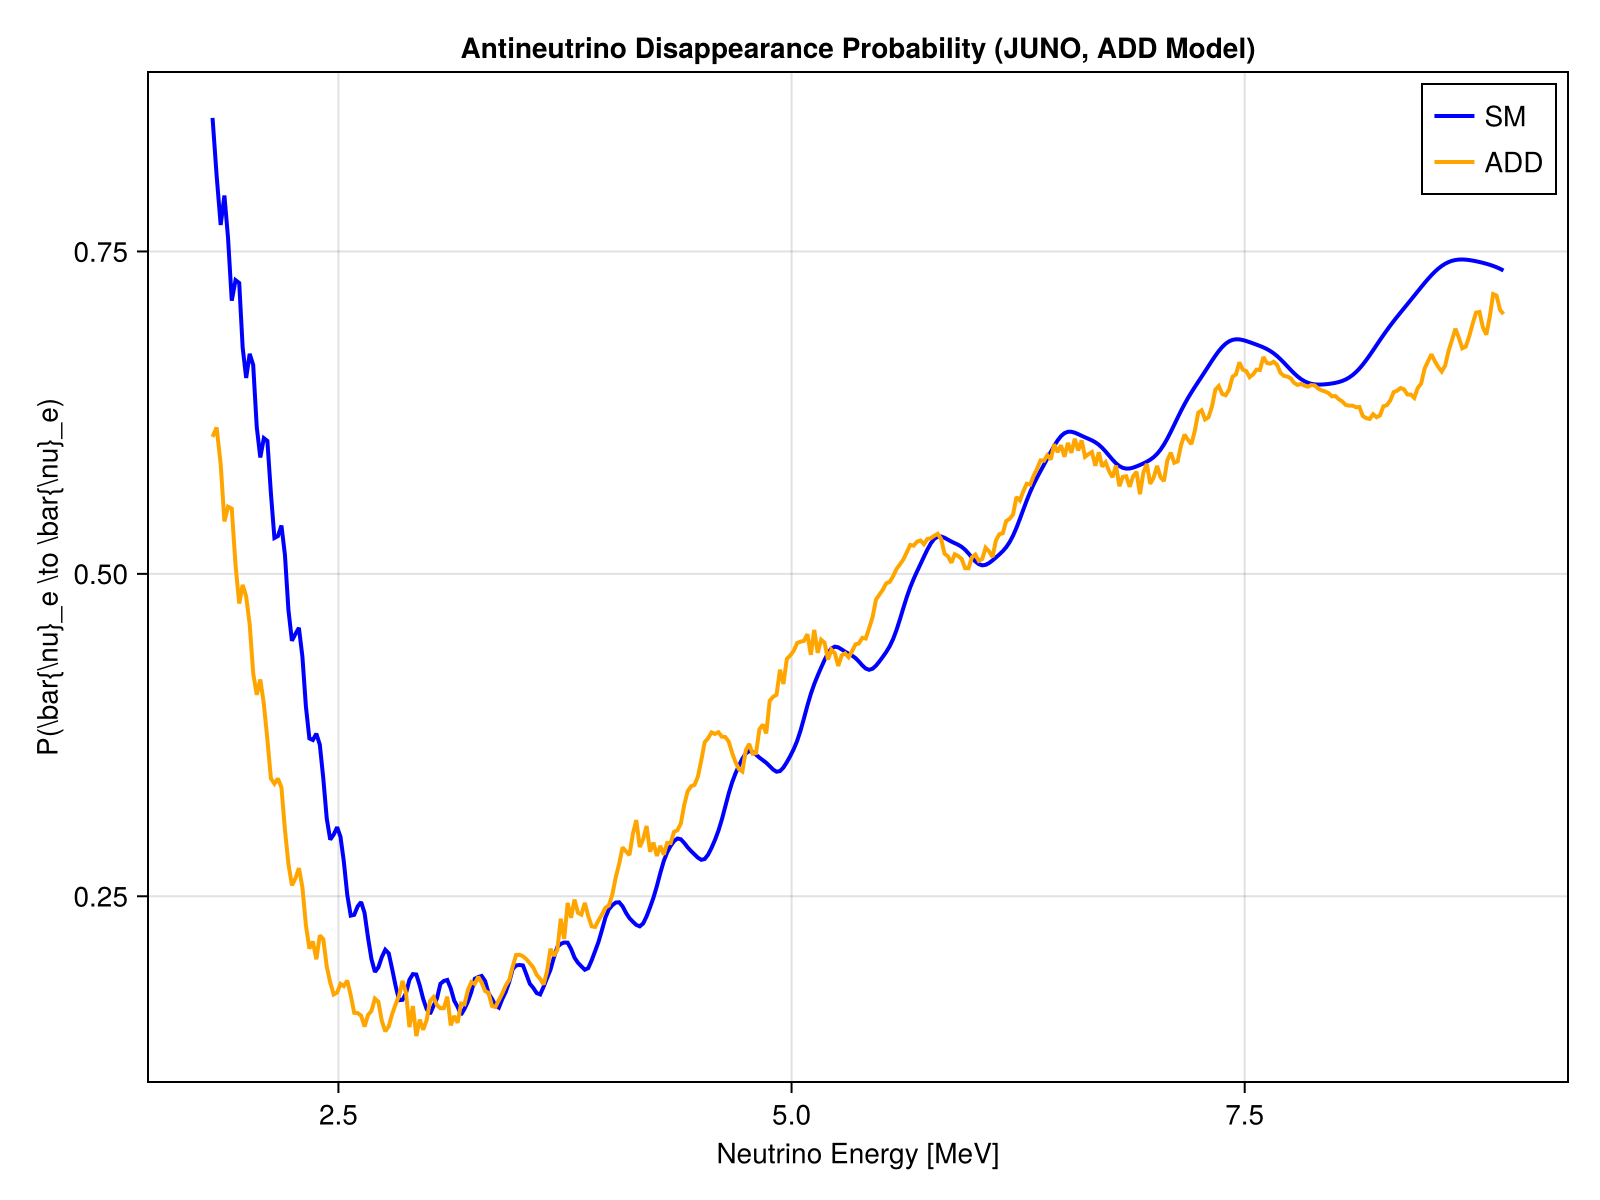

In [15]:
pro_ADD_lar = Newtrinos.juno.osc_calc(params_ADD_new, physics_ADD, a_ADD)

P_ee_ADD = pro_ADD_lar.P_ee     # Shape: (n_energies, n_reactors)

E_vis_ADD = a_ADD.E_bins_visible  # MeV

E_nu_ADD = a_ADD.visible_to_neutrino_interp.(E_vis_ADD .* params_ADD_new.energy_scale)  # Neutrino energy (MeV)

P_ee_SM = pro_SM.P_ee     # Shape: (n_energies, n_reactors)

E_vis_SM = a_SM.E_bins_visible  # MeV

E_nu_SM = a_SM.visible_to_neutrino_interp.(E_vis_SM .* p_SM.energy_scale)  # Neutrino energy (MeV)

fig = Figure(size=(800, 600))
ax = Axis(fig[1, 1],
    xlabel="Neutrino Energy [MeV]",
    ylabel="P(\\bar{\\nu}_e \\to \\bar{\\nu}_e)",
    title="Antineutrino Disappearance Probability (JUNO, ADD Model)"
)



CairoMakie.lines!(ax, E_nu_SM, pro_SM.prob_weighted_flat, color=:blue, linewidth=2, label="SM")
CairoMakie.lines!(ax, E_nu_ADD, pro_ADD_lar.prob_weighted_flat, color=:orange, linewidth=2, label="ADD")


axislegend(ax)
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


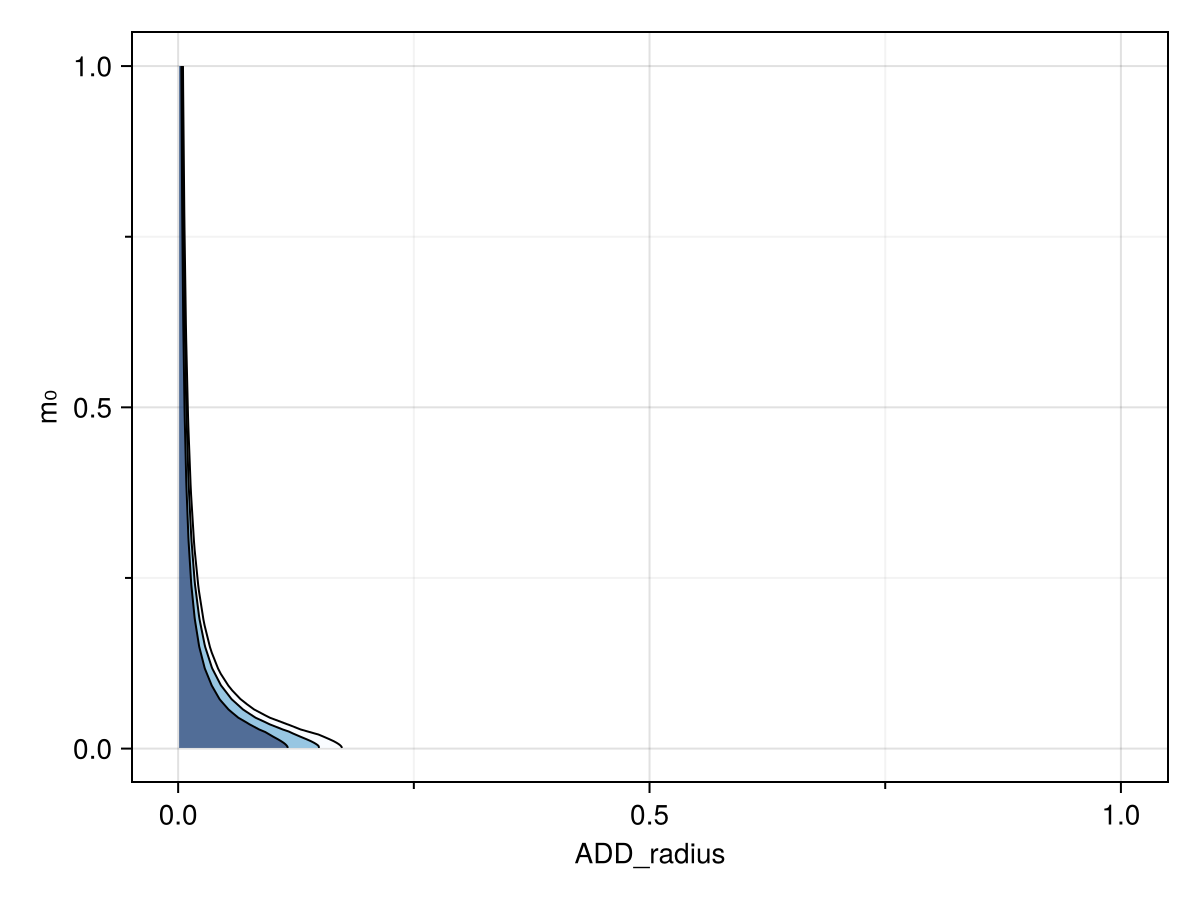

In [16]:
scan_ADD = Newtrinos.scan(lik_ADD, pri_ADD, (ADD_radius=30,  m₀=30), p_ADD)
pl_sc_ADD = CairoMakie.plot(scan_ADD)

In [17]:
logL_ADD = logdensityof(lik_ADD, p_ADD)
println("Llh for ADD model: ", logL_ADD)

logL_SM = logdensityof(lik_SM, p_SM)  
println("Llh for SM model: ", logL_SM)

Llh for ADD model: -1315.9569525660715
Llh for SM model: -1315.9568184213763


In [18]:
llh_profile_1D_ADD_radius = [maximum(scan_ADD.values.log_posterior[i, :]) for i in 1:size(scan_ADD.values.log_posterior, 1)]

q_values_1D = -2 * (llh_profile_1D_ADD_radius .- maximum(llh_profile_1D_ADD_radius))
println("Full q_values_1D: ", q_values_1D)

add_radius_scan_points_1D = scan_ADD.axes.ADD_radius

Plots.plot(add_radius_scan_points_1D, q_values_1D, marker=:o, xlabel="ADD_radius", ylabel="-2ΔLLH", title="")
Plots.hline!([2.71], label="90% CL (1 dof)", linestyle=:dash)
Plots.hline!([3.84], label="95% CL (1 dof)", linestyle=:dot)

Full q_values_1D: [-0.0, 7.622980683663627e-5, 0.00010310944526281673, 0.0001245579524038476, 0.00013601183172795572, 0.00014265673598856665, 0.0001633631991353468, 0.00017729434921420761, 0.00021000732886022888, 0.00027787626549979905, 0.0004265710745130491, 0.0007590662185066321, 0.0015793323873367626, 0.0035859252643604123, 0.008626783980162145, 0.02143805277592037, 0.05410741510104344, 0.13825092274964845, 0.3550619155612367, 0.9133210749209866, 2.346738930201809, 6.012080019106634, 15.308868222753063, 38.06629684749123, 89.64061324547265, 182.8736384031704, 264.1471312622434, 167.1297044620551, 109.33208333676203, 173.37196219646148]


GKS: dlopen(/Users/melikeerbek/.julia/artifacts/6ac5d5e20ad53d5594a298f35287b91138ac419d/lib/cairoplugin.so, 0x0001): Library not loaded: @rpath/libtiff.6.dylib
  Referenced from: <4C4C4442-5555-3144-A1E3-23DDFF670CE0> /Users/melikeerbek/.julia/artifacts/6ac5d5e20ad53d5594a298f35287b91138ac419d/lib/cairoplugin.so
  Reason: tried: '/Users/melikeerbek/.julia/artifacts/6ac5d5e20ad53d5594a298f35287b91138ac419d/lib/./libtiff.6.dylib' (no such file), '/Users/melikeerbek/.julia/artifacts/6ac5d5e20ad53d5594a298f35287b91138ac419d/lib/./libtiff.6.dylib' (no such file), '/workspace/destdir/lib/libtiff.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/workspace/destdir/lib/libtiff.6.dylib' (no such file), '/Users/melikeerbek/.julia/artifacts/6ac5d5e20ad53d5594a298f35287b91138ac419d/lib/./libtiff.6.dylib' (no such file), '/Users/melikeerbek/.julia/juliaup/julia-1.11.4+0.aarch64.apple.darwin14/lib/libtiff.6.dylib' (no such file), '/usr/local/lib/libtiff.6.dylib' (no such file), '/usr/li

In [19]:
Plots.heatmap(scan_ADD.axes.ADD_radius, scan_ADD.axes.m₀, scan_ADD.values.log_posterior, xlabel="ADD_radius", ylabel="m₀", title="2D Log-Posterior", xscale=:log10)

In [20]:
Plots.plot(scan_ADD.axes.m₀, scan_ADD.values.log_posterior[:, findmin(abs.(scan_ADD.axes.ADD_radius .- 0.54))[2]], xlabel="m₀", ylabel="Log-Posterior", title="Slice at ADD_radius = 0.54 μm")

In [21]:
idx_peak = findmin(abs.(scan_ADD.axes.ADD_radius .- 0.5393701314319655))[2]
idx_dip = findmin(abs.(scan_ADD.axes.ADD_radius .- 0.7009959575271318))[2]
p1 = Plots.plot(scan_ADD.axes.m₀, scan_ADD.values.log_posterior[idx_peak, :], xlabel="m₀ (eV)", ylabel="Log-Posterior", title="Slice at ADD_radius = 0.54 μm", label="Log-Posterior")
p2 = Plots.plot(scan_ADD.axes.m₀, scan_ADD.values.log_posterior[idx_dip, :], xlabel="m₀ (eV)", ylabel="Log-Posterior", title="Slice at ADD_radius = 0.70 μm", label="Log-Posterior")
Plots.plot(p1, p2, layout=(2,1))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


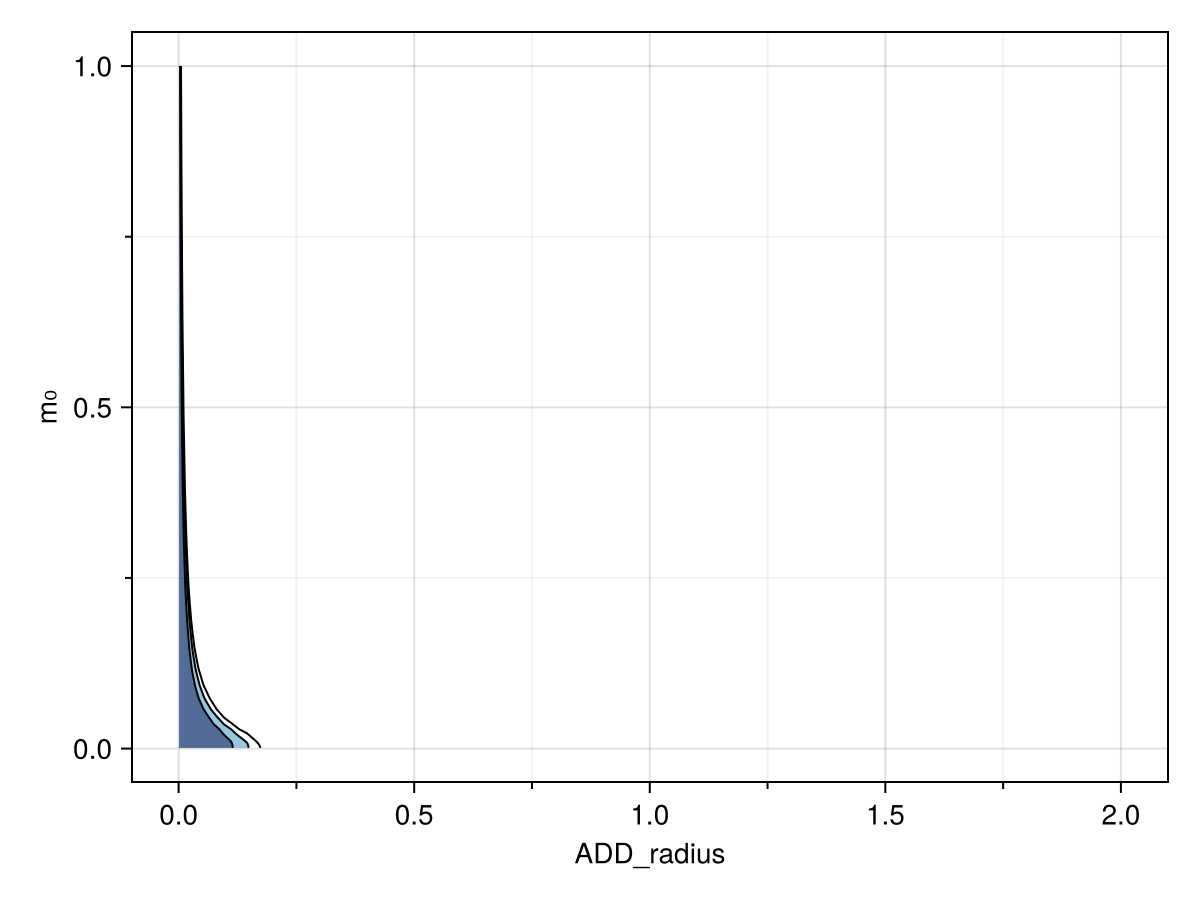

In [22]:
scan_ADD_larprio = Newtrinos.scan(lik_ADD, priors_ADD_new, (ADD_radius=30,  m₀=30), p_ADD)
pl_ADD_larprio = CairoMakie.plot(scan_ADD_larprio)

In [23]:
llh_profile_1D_ADD_radius = [maximum(scan_ADD_larprio.values.log_posterior[i, :]) for i in 1:size(scan_ADD_larprio.values.log_posterior, 1)]

q_values_1D = -2 * (llh_profile_1D_ADD_radius .- maximum(llh_profile_1D_ADD_radius))
println("Full q_values_1D: ", q_values_1D)

add_radius_scan_points_1D = scan_ADD_larprio.axes.ADD_radius

Plots.plot(add_radius_scan_points_1D, q_values_1D, marker=:o, xlabel="ADD_radius", ylabel="-2ΔLLH", title="")
Plots.hline!([2.71], label="90% CL (1 dof)", linestyle=:dash)
Plots.hline!([3.84], label="95% CL (1 dof)", linestyle=:dot)

Full q_values_1D: [-0.0, 0.00010812744267241214, 0.0001233719240190112, 0.00012773227626894368, 0.00013024445843257126, 0.00015440904007846257, 0.00016870653917067102, 0.0001963370696103084, 0.00025889333392115077, 0.0004038725201098714, 0.0007639629684490501, 0.0017076578342312132, 0.004265326029781136, 0.011370856282155728, 0.03112820919659498, 0.08702507846510343, 0.2444866605756033, 0.6917394926717861, 1.9536969363757635, 5.511513269548686, 15.411026147177381, 41.91361406189435, 105.68557960038925, 215.73470122678555, 249.0166822229353, 105.81601381281098, 163.88694891361865, 162.92973384132756, 213.1856541776965, 349.09657615035076]
